<div align='center'><a href='https://linktr.ee/fea.dev'/ style='display:inline-block'>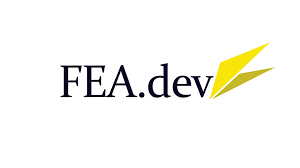<a/><div/>

## <font color=green|black>**DESAFIO 4 - Variação de Cotas | Tempo Relativo**</font>


*Em anexo temos o arquivo "cotas.xlsx" com dados das cotas líquidas e Patrimônio de alguns fundos de investimento desde o início de suas operações até o início de 2023*

- As datas estão no formato "yyyy/mm/dd"
- As datas compreendem apenas dias úteis

*Faça um código capaz de gerar automaticamente a variação das cotas e pl dos fundos nos seguintes períodos (Não se preocupe em decorar, faremos um passo a passo logo abaixo):* 

- Todos os trimestres desde o início da operação do fundo até a última data disponível
- Todos os semestres...
- Todos os anos...

*Instruções Gerais*
- Individual
- Não upar no github pois são dados reais (apesar de ser informação pública)
- Me enviar no no pv do discord

### Você deverá seguir os seguites passos..

### 1. Importar o arquivo "cotas.xlsx" para o seu ambiente de trabalho e visualizar os dados e o tipo das colunas

In [1626]:
# Rode a célula
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('cotas.xlsx')
df

,dataRef,id_fundo,PL,cota
0,2021-06-30,16,21670000.00,1.000000
1,2021-06-30,11,22780000.00,1.000000
2,2021-06-30,13,1200000.00,1.000000
3,2021-06-30,14,21760000.00,1.000000
4,2021-06-30,12,22680000.00,1.000000
...,...,...,...,...
4143,2023-02-02,24,10561757.82,1.056176
4144,2023-02-02,15,4531309.60,1.001222
4145,2023-02-02,13,4579053.88,0.850468
4146,2023-02-02,14,26808846.66,0.867597


In [1627]:
from datetime import date
from datetime import datetime
from datetime import timedelta

In [1628]:
# Visualize o tipo de colunas
#####SEU CODIGO COMECA AQUI##### 
df.columns

Index(['dataRef', 'id_fundo', 'PL', 'cota'], dtype='object')

### 2. Para Facilitar, filtre para o dataframe exibir apenas o fundo com o id 12

In [1629]:
id12 = df[(df['id_fundo'] == 12)]
id12['dataRef'] = pd.to_datetime(id12['dataRef'])
id12

,dataRef,id_fundo,PL,cota
4,2021-06-30,12,22680000.00,1.000000
8,2021-07-01,12,22658260.36,0.999041
16,2021-07-02,12,23274001.39,1.004145
19,2021-07-05,12,24206825.11,1.001246
26,2021-07-06,12,24602017.83,0.993395
...,...,...,...,...
4091,2023-01-27,12,31580390.41,1.028955
4103,2023-01-30,12,31685793.36,1.032389
4117,2023-01-31,12,32066156.48,1.044782
4130,2023-02-01,12,31933673.99,1.040466


## <font color=green|black>**3 - Peers**</font>

##### 3.1. Faça uma função que a partir de uma data especificada (no formato yyyy-mm-dd), gere uma lista ou dicionário ou dataframe (o que achar melhor para agregar a sua lógica), com as seguintes datas

*Periodo*           | *Descrição*
--------------------|-------------------------      
Lastday             | dia útil anterior
MTD                 | primeiro dia útil do mês
Quarter               | primeiro dia útil do trimestre
YTD                 | primeiro dia útil do ano
Last six months     | data de 6 meses atrás
Last year           | data de 1 ano atrás
Last 24 months      | data de 2 anos atrás (se houver)
Since inception     | data de início do fundo


In [1630]:
from pandas.tseries.offsets import BDay
from datetime import time

def datas2(year,month,day):
    dia_d = date(year,month,day)

    # Dia útil anterior
    lastday = dia_d - BDay(1)

    # MTD = pd.date_range(end=dia_d, periods=1, freq='BMS') # eu tentei assim pra MTD, Quarter e YTD mas ele fica como <class 'pandas.core.indexes.datetimes.DatetimeIndex'> e eu não consigo transformar de jeito nenhum em <class 'pandas._libs.tslibs.timestamps.Timestamp'> pra dar o merge no id12 depois
    
    # Primeiro dia útil do mês
    MTD = dia_d.replace(day=1)
    first_business_day_of_month = MTD
    if MTD.weekday() >= 5:
        days_to_add = 7 - MTD.weekday()
        first_business_day_of_month += timedelta(days_to_add)
    
    # Primeiro dia útil do trimestre
    quarter_month = (dia_d.month-1)//3*3 + 1
    first_day_of_quarter = dia_d.replace(month=quarter_month, day=1)
    Quarter = first_day_of_quarter
    if first_day_of_quarter.weekday() >= 5:
        days_to_add = 7 - first_day_of_quarter.weekday()
        Quarter += timedelta(days=days_to_add)

    # Primeiro dia útil do ano
    first_day_of_year = dia_d.replace(month=1, day=1)
    YTD = first_day_of_year
    if first_day_of_year.weekday() >= 5:
        days_to_add = 7 - first_day_of_year.weekday()
        YTD += timedelta(days=days_to_add)

    # 6 meses atrás
    Last_six_months = dia_d - BDay(6*30)

    # 1 ano atrás
    Last_year = dia_d - BDay(65)

    # 2 anos atrás
    Last_24_months = dia_d - BDay(2*365)

    # início do fundo
    Since_inception = id12.iloc[0]["dataRef"]

    periodos = [lastday, MTD, Quarter, YTD, Last_six_months, Last_year, Last_24_months, Since_inception]

    # dataframe com os períodos dados
    df_periodos = pd.DataFrame({
        'dataRef':[*periodos],
        'Período':['lastday', 'MTD', 'Quarter', 'YTD', 'Last_six_months', 'Last_year', 'Last_24_months', 'Since_inception']
    })

    # id12 filtrado com as datas dos períodos
    return id12.merge(df_periodos, how='inner', on='dataRef')

datas2(2023,2,2)

,dataRef,id_fundo,PL,cota,Período
0,2021-06-30,12,22680000.00,1.000000,Since_inception
1,2022-05-26,12,34976256.49,1.031550,Last_six_months
2,2022-11-03,12,38943410.90,1.158740,Last_year
3,2023-01-02,12,33000887.28,0.989607,Quarter
4,2023-01-02,12,33000887.28,0.989607,YTD
5,2023-02-01,12,31933673.99,1.040466,lastday
6,2023-02-01,12,31933673.99,1.040466,MTD


##### 3.2. Incremente na função anterior para que ela gere além das datas, a variação das cotas nos respectivos períodos

   >[Fórmula]
   >
   > $$ variacao-da-cota = (cota-atual / cota-periodo-anterior -1) * 100

Exemplo variação da cota "Lastday" no fundo 12 tendo de base o último dia disponível:

| Data | Cota |
|------|------|
| 2023-02-01 | 1.040466
| 2023-02-02 | 1.039887

   > $$ variacao-da-cota = (1.039887 / 1.040466 -1) * 100 = -0.05564814227470016


In [1631]:
#####SEU CODIGO COMECA AQUI##### 

# versão simples com id12
cota_anterior = [1]+[*id12['cota']]
cota_anterior = cota_anterior[:-1]

id12['cota_anterior'] = cota_anterior
id12['var_cota'] = (id12['cota'] / id12['cota_anterior'] - 1)*100
id12

,dataRef,id_fundo,PL,cota,cota_anterior,var_cota
4,2021-06-30,12,22680000.00,1.000000,1.000000,0.000000
8,2021-07-01,12,22658260.36,0.999041,1.000000,-0.095860
16,2021-07-02,12,23274001.39,1.004145,0.999041,0.510810
19,2021-07-05,12,24206825.11,1.001246,1.004145,-0.288634
26,2021-07-06,12,24602017.83,0.993395,1.001246,-0.784103
...,...,...,...,...,...,...
4091,2023-01-27,12,31580390.41,1.028955,1.026827,0.207260
4103,2023-01-30,12,31685793.36,1.032389,1.028955,0.333756
4117,2023-01-31,12,32066156.48,1.044782,1.032389,1.200429
4130,2023-02-01,12,31933673.99,1.040466,1.044782,-0.413158


In [1632]:
def datas_com_var(year,month,day):
    dia_d = date(year,month,day)
    
    #lastday
    lastday = dia_d - timedelta(days=1)
    if lastday.weekday() >= 5:
        while lastday.weekday() >= 5: # 5 e 6 == sab e dom
            lastday -= timedelta(days=1)

    # First business day of the same month
    MTD = dia_d.replace(day=1)
    first_business_day_of_month = MTD
    if MTD.weekday() >= 5:
        days_to_add = 7 - MTD.weekday()
        first_business_day_of_month += timedelta(days=days_to_add)
    
    # First business day of the same quarter
    quarter_month = (dia_d.month-1)//3*3 + 1
    first_day_of_quarter = dia_d.replace(month=quarter_month, day=1)
    Quarter = first_day_of_quarter
    if first_day_of_quarter.weekday() >= 5:
        days_to_add = 7 - first_day_of_quarter.weekday()
        Quarter += timedelta(days=days_to_add)

    # First business day of the same year
    first_day_of_year = dia_d.replace(month=1, day=1)
    YTD = first_day_of_year
    if first_day_of_year.weekday() >= 5:
        days_to_add = 7 - first_day_of_year.weekday()
        YTD += timedelta(days=days_to_add)

    # 6 meses atrás
    Last_six_months = dia_d - timedelta(days=6*30)

    # 1 ano atrás
    Last_year = dia_d - timedelta(days=365)

    # 2 anos atrás
    Last_24_months = dia_d - timedelta(days=2*365)

    # início do fundo
    Since_inception = id12.iloc[0]["dataRef"]

    periodos = [lastday, MTD, Quarter, YTD, Last_six_months, Last_year, Last_24_months, Since_inception]

    # dataframe com os períodos dados
    df_periodos = pd.DataFrame({
        'dataRef':[*periodos],
        'Período':['lastday', 'MTD', 'Quarter', 'YTD', 'Last_six_months', 'Last_year', 'Last_24_months', 'Since_inception']
    })

    # id12 filtrado com as datas dos períodos
    f = id12.merge(df_periodos, how='inner', on='dataRef')
    
    cota_anterior = [1]+[*f['cota']]
    cota_anterior = cota_anterior[:-1]

    f['cota_anterior'] = cota_anterior
    f['var_cota'] = (f['cota'] / f['cota_anterior'] - 1)*100
    return f

datas_com_var(2023,2,2)

,dataRef,id_fundo,PL,cota,cota_anterior,var_cota,Período
0,2021-06-30,12,22680000.00,1.000000,1.000000,0.000000,Since_inception
1,2022-02-02,12,34229100.40,1.010901,1.000000,1.090140,Last_year
2,2023-01-02,12,33000887.28,0.989607,1.010901,-2.106457,Quarter
3,2023-01-02,12,33000887.28,0.989607,0.989607,0.000000,YTD
4,2023-02-01,12,31933673.99,1.040466,0.989607,5.139261,lastday
5,2023-02-01,12,31933673.99,1.040466,1.040466,0.000000,MTD


## <font color=green|black>**4 - Todos os períodos**</font>

### 4.1 Aqui começa o desafio: Faça um código que gere automaticamente a primeira e última data de cada mês, trimestre e ano.

#### 4.1.1 Months

Segue um exemplo de output esperado:

In [1633]:
start_date = df.loc[0,'dataRef']
end_date = df.loc[df.shape[0]-1,'dataRef']

In [1634]:
month_start = list(pd.bdate_range(start_date, end_date, freq='BMS', inclusive='both')) 
month_start.insert(0, start_date) # tive de adicionar os meses 'cortados' manualmente pois não achei um código que resolvesse isso automaticamente (a nota no final do capítulo nesse link explica que não funciona mas ele não indica como resolver: https://pandas.pydata.org/docs/user_guide/timeseries.html#offset-aliases)

month_end = list(pd.bdate_range(start_date, end_date, freq='BM', inclusive='both')) # tentei add tz="America/Sao_Paulo" pra ficar com o dia 25 no fim de fev.2022 mas não funcionou
month_end.append(end_date) 

years = [i.year for i in month_start]
months = [i.month for i in month_end]

meses = pd.DataFrame({'year': years, 'month':months, 'month_start': month_start, 'month_end': month_end })
meses

,year,month,month_start,month_end
0,2021,6,2021-06-30,2021-06-30
1,2021,7,2021-07-01,2021-07-30
2,2021,8,2021-08-02,2021-08-31
3,2021,9,2021-09-01,2021-09-30
4,2021,10,2021-10-01,2021-10-29
5,2021,11,2021-11-01,2021-11-30
6,2021,12,2021-12-01,2021-12-31
7,2022,1,2022-01-03,2022-01-31
8,2022,2,2022-02-01,2022-02-28
9,2022,3,2022-03-01,2022-03-31


#### 4.1.2 Quarters

Segue um exemplo de output esperado:

In [1635]:
quarter_start = list(pd.bdate_range(start_date, end_date, freq='BQS', inclusive='both')) 
quarter_start.insert(0, start_date) 

quarter_end = list(pd.bdate_range(start_date, end_date, freq='BQ', inclusive='both'))
quarter_end.append(end_date) 

years = [i.year for i in quarter_start]
quarters = [i.quarter for i in quarter_start]

trimestres = pd.DataFrame({'year': years, 'quarter':quarters, 'quarter_start': quarter_start, 'quarter_end': quarter_end })
trimestres

,year,quarter,quarter_start,quarter_end
0,2021,2,2021-06-30,2021-06-30
1,2021,3,2021-07-01,2021-09-30
2,2021,4,2021-10-01,2021-12-31
3,2022,1,2022-01-03,2022-03-31
4,2022,2,2022-04-01,2022-06-30
5,2022,3,2022-07-01,2022-09-30
6,2022,4,2022-10-03,2022-12-30
7,2023,1,2023-01-02,2023-02-02


#### 4.1.3  Years

Segue um exemplo de output esperado:

In [1636]:
#####SEU CODIGO COMECA AQUI##### 
year_start = list(pd.bdate_range(start_date, end_date, freq='BYS', inclusive='both')) 
year_start.insert(0, start_date) 

year_end = list(pd.bdate_range(start_date, end_date, freq='BY', inclusive='both'))
year_end.append(end_date) 

years = [i.year for i in year_start]

anos = pd.DataFrame({'year': years, 'year_start': year_start, 'year_end': year_end })
anos

,year,year_start,year_end
0,2021,2021-06-30,2021-12-31
1,2022,2022-01-03,2022-12-30
2,2023,2023-01-02,2023-02-02


#### 4.2 - Merges

Aqui você pode decidir se quer juntar todas essas tabelas em uma só ou se quer usar todas separadas (Tudo depende da sua lógica - não obrigatório)

In [1637]:
#####SEU CODIGO COMECA AQUI##### 
datas2 = anos.merge(trimestres.merge(meses, on='year'), on='year')
datas2 = datas2[['year', 'year_start', 'year_end', 'quarter','quarter_start','quarter_end','month','month_start','month_end']]
datas2

,year,year_start,year_end,quarter,quarter_start,quarter_end,month,month_start,month_end
0,2021,2021-06-30,2021-12-31,2,2021-06-30,2021-06-30,6,2021-06-30,2021-06-30
1,2021,2021-06-30,2021-12-31,2,2021-06-30,2021-06-30,7,2021-07-01,2021-07-30
2,2021,2021-06-30,2021-12-31,2,2021-06-30,2021-06-30,8,2021-08-02,2021-08-31
3,2021,2021-06-30,2021-12-31,2,2021-06-30,2021-06-30,9,2021-09-01,2021-09-30
4,2021,2021-06-30,2021-12-31,2,2021-06-30,2021-06-30,10,2021-10-01,2021-10-29
...,...,...,...,...,...,...,...,...,...
66,2022,2022-01-03,2022-12-30,4,2022-10-03,2022-12-30,10,2022-10-03,2022-10-31
67,2022,2022-01-03,2022-12-30,4,2022-10-03,2022-12-30,11,2022-11-01,2022-11-30
68,2022,2022-01-03,2022-12-30,4,2022-10-03,2022-12-30,12,2022-12-01,2022-12-30
69,2023,2023-01-02,2023-02-02,1,2023-01-02,2023-02-02,1,2023-01-02,2023-01-31


#### 4.3 - Variação das cotas

- Importante: a variação das cotas de um período na verdade é o valor do dia dividido pelo dia útil anterior da data inicial -1.


Exemplo: Para saber a variação de cotas do ano de 2022 pegamos o último dia útil de 2022 e dividimos pelo último dia útil de 2021 (que é o dia útil anterior a data inicial do ano) e assim por diante

| Data | Cota |
|------|------|
| 2021-12-31 | 0.955797
| 2022-12-30 | 1.011955

   > $$ variacao-da-cota = (1.011955 / 0.955797 -1) * 100 = 5.8755



.. E por que você já não avisou isso antes Kevs?!?!?! - Daria para ter feito as tabelas de months, quarters e years já seguindo essa lógica 😡🤬

- O objetivo aqui é que vocês aprendam a usar uma biblioteca chamada "bizdays" em que se pode manipular facilmente dias úteis ~instruções mais a frente~
- Importante: Não é necessário mexer no tópico 3 'Peers' e alterar a lógica, pode deixar do jeito que está



#### 4.3.1 - Instale a biblioteca bizdays

In [1638]:
# Descomente a linha abaixo para instalar o pacote bizdays
# pip install bizdays

#### 4.3.2 - Baixe o arquive do drive "ANBIMA.cal" e salve em uma pasta de sua preferência

Coloque em uma pasta com nome intuitivo, será importante pois para usar a biblioteca bizdays você precisa passar o caminho do arquivo, o bom é que dá para usar em qualquer código que quiser depois

In [1639]:
# Carregando bizdays
from bizdays import Calendar
from os.path import expanduser
# Mude o caminho abaixo para o caminho salvo do seu arquivo ANBIMA.cal
#calendar_path = expanduser("~").replace('\\', '/') + '/Desktop/USP/FeaDev/Calendario_bizdays/ANBIMA.cal' # Esse é um exemplo de como uso no meu computador
calendar_path = r'C:\VS\USP\fea_dev\Treinamento\Desafio4 - Variação Cotas _ Tempo Relativo\ANBIMA.cal'  # Complete aqui, o expanduser("~") serve para obter automaticamente o nome do seu usuário 
# não funcionou, acho que pq eu salvo no C:, pesquisei o erro e resolveu assim: r'(path)'

cal = Calendar.load(filename= calendar_path) # Carregando o calendário

#link com a documtação do bizdays: https://wilsonfreitas.github.io/python-bizdays/

#### 4.3.3 - Faça uma função que use as datas iniciais e finais de cada mês, trimestre e ano para gerar a variação das cotas automaticamente

- Use bizdays para pegar um dia útil anterior as data inicial
    - Dica: cal.offset(data_inicial, -1)

- Se atente quando a data inicial for a primeira data do fundo, pois não terá um dia útil anterior, nesse caso use a data inicial mesmo

In [1640]:
### eu não entendi muito bem o que foi pedido, considerando que nos dataframes meses, trimestres e anos já é dado as datas finais de cada período e já considerando os dias úteis
### além disso, o bizdays pega o dia útil anterior, o que não faz muito sentido pro caso das datas finais dos meses por exemplo, que vai retornar o penúltimo dia anterior

id12

,dataRef,id_fundo,PL,cota,cota_anterior,var_cota
4,2021-06-30,12,22680000.00,1.000000,1.000000,0.000000
8,2021-07-01,12,22658260.36,0.999041,1.000000,-0.095860
16,2021-07-02,12,23274001.39,1.004145,0.999041,0.510810
19,2021-07-05,12,24206825.11,1.001246,1.004145,-0.288634
26,2021-07-06,12,24602017.83,0.993395,1.001246,-0.784103
...,...,...,...,...,...,...
4091,2023-01-27,12,31580390.41,1.028955,1.026827,0.207260
4103,2023-01-30,12,31685793.36,1.032389,1.028955,0.333756
4117,2023-01-31,12,32066156.48,1.044782,1.032389,1.200429
4130,2023-02-01,12,31933673.99,1.040466,1.044782,-0.413158


In [1641]:
#####SEU CODIGO COMECA AQUI##### 
# não consegui
meses = meses.rename(columns={'month_start':'dataRef'}).drop(columns=['month_end'], axis=1)
anos = anos.rename(columns={'year_start':'dataRef'}).drop(columns=['year_end'], axis=1)
trimestres = trimestres.rename(columns={'quarter_start':'DataRef'}).drop(columns=['quarter_end'], axis=1)

id12inicial = id12.rename(columns={'cota':'cota_inicial'}).drop(columns=['cota_anterior','var_cota'], axis=1)
id12final = id12.rename(columns={'cota':'cota_lastday'}).drop(columns=['cota_anterior','var_cota'], axis=1)

def func(frame):
    frame2 = frame.merge(id12inicial, on='dataRef')

    frame3 = frame.merge(id12final, on='dataRef')
    frame3['lastday'] = cal.offset(frame['dataRef'], -1)[1:]
    frame3 = frame3.drop(columns=['dataRef'], axis=1)
    frame3 = frame3.rename(columns={'lastday':'dataRef'})

    frame2['cota_lastday'] = frame3['cota_lastday']
    frame2['var_cota'] = (frame2['cota_lastday'] / frame2['cota_inicial'] - 1)*100

    return frame2

func(meses)

,year,month,dataRef,id_fundo,PL,cota_inicial,cota_lastday,var_cota
0,2021,6,2021-06-30,12,22680000.00,1.000000,1.000000,0.0
1,2021,7,2021-07-01,12,22658260.36,0.999041,0.999041,0.0
2,2021,8,2021-08-02,12,25973850.74,1.016958,1.016958,0.0
3,2021,9,2021-09-01,12,25561346.09,0.998808,0.998808,0.0
4,2021,10,2021-10-01,12,30680483.15,0.997587,0.997587,0.0
5,2021,11,2021-11-01,12,28585424.62,0.933648,0.933648,0.0
6,2021,12,2021-12-01,12,30524308.84,0.925573,0.925573,0.0
7,2022,1,2022-01-03,12,32309795.55,0.939095,0.939095,0.0
8,2022,2,2022-02-01,12,34359218.27,1.014744,1.014744,0.0
9,2022,4,2022-04-01,12,37537317.55,1.108014,1.108014,0.0


<div align='center'><a href='https://linktr.ee/fea.dev'/ style='display:inline-block'><img src=" 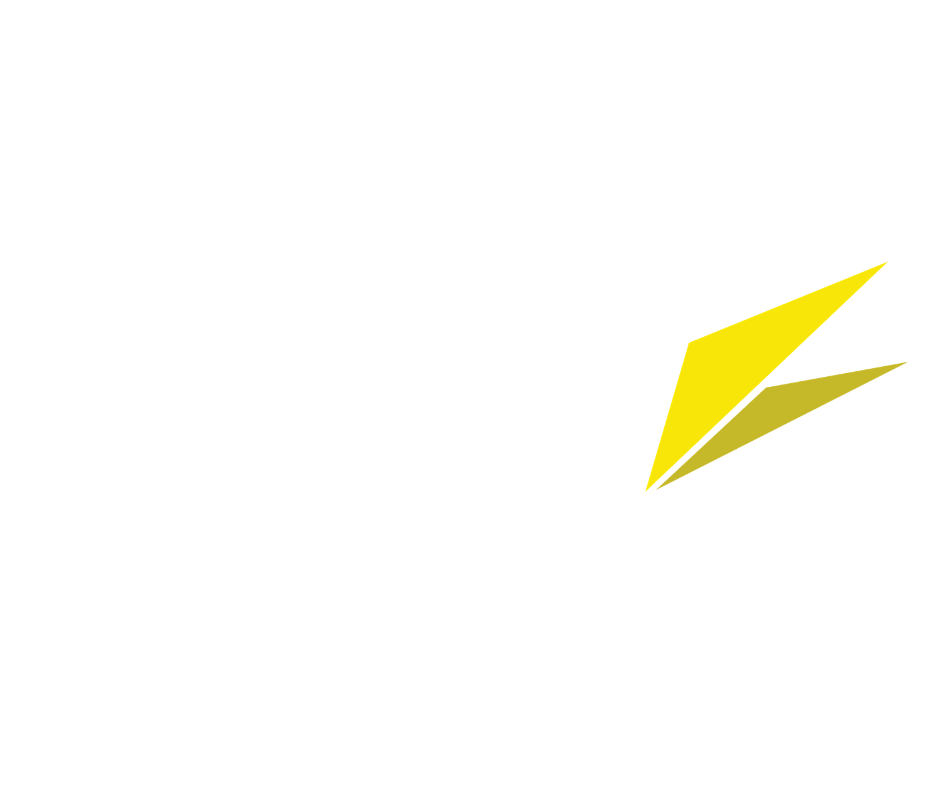" height="100%" width="350" ><a/><div/>